In [ ]:
import pandas as pd
import os


['.config', 'sample_data']


In [57]:
def get_statistics(filename):

  df = pd.read_json(filename)

  # top_5 accuracy
  top5_accuracy = df.apply(lambda row: row['top_indices'].count(row['true_label']), axis=1).sum()
  top5_accuracy = 100 * top5_accuracy / df.shape[0]

  # (top_1) accuracy
  accuracy = 100 * (df['true_label_rank'] == 1).sum() / df.shape[0]

  # Mean and variance of the true label probability and of the entropy of the distribution
  avg_true_label = df['true_label_probability'].mean()
  var_true_label = df['true_label_probability'].var()

  avg_entropy = df['prediction_entropy'].mean()
  var_entropy = df['prediction_entropy'].var()

  return [top5_accuracy, accuracy, avg_true_label, var_true_label, avg_entropy, var_entropy]

In [62]:
CLIP_stat = get_statistics('CLIP_Base_results.json')
MEMO_stat = get_statistics('MEMO_results.json')
CB_stat = get_statistics('CB_results.json')
DGA_stat = get_statistics('DGA_results.json')
CoOP_stat = get_statistics('CoOp_results.json')
TPTCoOp_stat = get_statistics('TPT_results.json')
CLIPDepth_stat = get_statistics('CLIP+Depth_results.json')

In [63]:
results = pd.DataFrame([CLIP_stat, MEMO_stat, CB_stat, DGA_stat, CoOP_stat, TPTCoOp_stat, CLIPDepth_stat],
                       columns = ['top5_accuracy', 'accuracy', 'avg_true_label', 'var_true_label', 'avg_entropy', 'var_entropy'])

In [77]:
import matplotlib.pyplot as plt

def plot_histogram(data, ax, title = None,
                   labels = ['CLIP', 'MEMO', 'CB', 'DGA', 'CoOP', 'TPTCoOp', 'CLIPDepth'], color = 'blue'):

    ax.bar(labels, data, color = color, alpha=0.6)
    ax.set_xlabel('Metrics')
    ax.set_ylabel('Values')
    ax.set_title(title)
    ax.tick_params(axis='x', rotation=45)


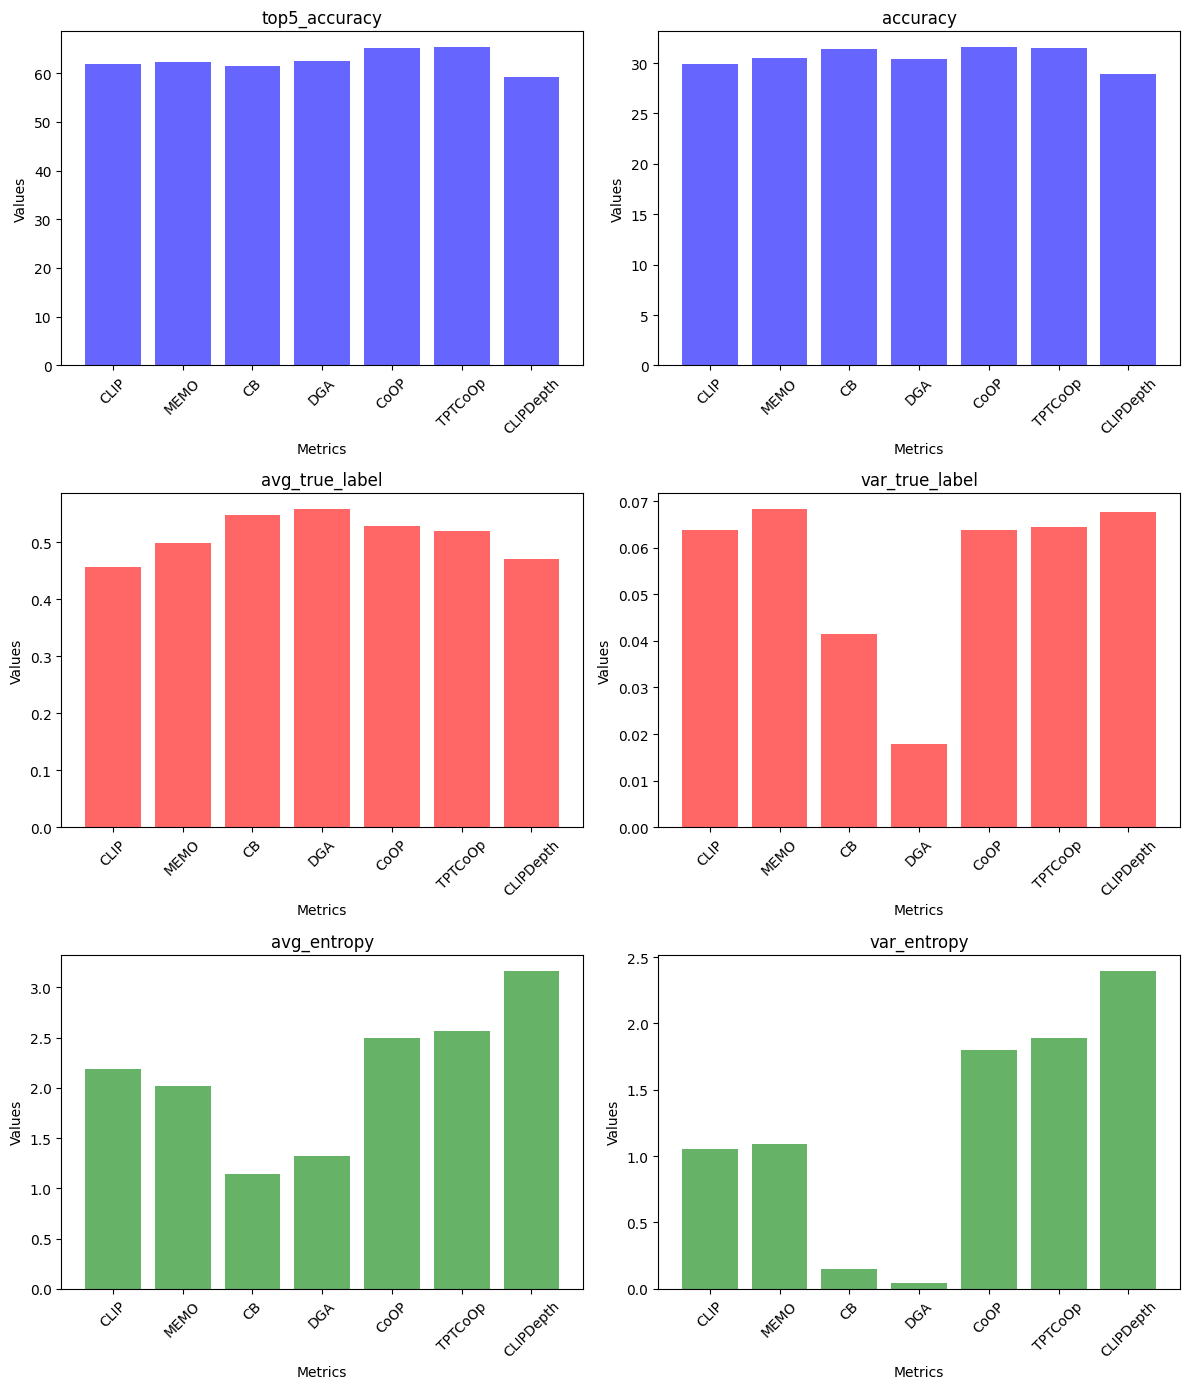

In [79]:
fig, axes = plt.subplots(3, 2, figsize=(12, 14))
axes = axes.flatten()

colors = ['blue', 'blue', 'red', 'red', 'green', 'green']

# Plot histograms for each column
for i in range(len(results.columns)):
    ax = axes[i]
    plot_histogram(results.iloc[:, i].tolist(), ax, title = results.columns[i], color = colors[i])

plt.tight_layout()
plt.show()


In [80]:
print(results)

   top5_accuracy   accuracy  avg_true_label  var_true_label  avg_entropy  \
0      61.813333  29.920000        0.457518        0.063850     2.184881   
1      62.253333  30.480000        0.499628        0.068373     2.014097   
2      61.533333  31.373333        0.548202        0.041501     1.142278   
3      62.400000  30.360000        0.558847        0.017761     1.324729   
4      65.266667  31.573333        0.528779        0.063831     2.494523   
5      65.320000  31.466667        0.520549        0.064580     2.562313   
6      59.200000  28.893333        0.471127        0.067637     3.167169   

   var_entropy  
0     1.053730  
1     1.094092  
2     0.150976  
3     0.045240  
4     1.799124  
5     1.893038  
6     2.398848  
